## Employee-Satisfaction-Index

In [1]:
#Import Packages
import pandas as pd
import missingno as msno 

In [2]:
esi = pd.read_csv("../Data/Employee-Satisfaction-Index.csv")

In [3]:
esi.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [4]:
esi2 = esi.drop(columns=['emp_id', 'Unnamed: 0'])


In [5]:
esi2


,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


In [6]:
esi2.info


<bound method DataFrame.info of      age        Dept location education    recruitment_type  job_level  \
0     28          HR   Suburb        PG            Referral          5   
1     50  Technology   Suburb        PG             Walk-in          3   
2     43  Technology   Suburb        UG            Referral          4   
3     44       Sales     City        PG           On-Campus          2   
4     33          HR     City        UG  Recruitment Agency          2   
..   ...         ...      ...       ...                 ...        ...   
495   49          HR   Suburb        PG           On-Campus          2   
496   24  Technology   Suburb        UG            Referral          2   
497   34   Marketing     City        PG           On-Campus          1   
498   26  Technology     City        UG           On-Campus          2   
499   26  Technology     City        UG  Recruitment Agency          3   

     rating  onsite  awards  certifications  salary  satisfied  
0         2   

In [7]:
esi['Dept'].unique()

array(['HR', 'Technology', 'Sales', 'Purchasing', 'Marketing'],
      dtype=object)

In [8]:
esi2['education'].replace(['PG', 'UG'],
                        [0,1], inplace=True)

## Education: 0 = PG, 1 = UG

In [9]:
esi2['Dept'].replace(['HR', 'Technology', 'Marketing', 'Sales', 'Purchasing'],
                     [0,1,2,3,4], inplace=True)


## Dept: 0 = HR, 1 = Technology, 2 = Marketing, 3 = Sales, 4 = Purchasing

In [10]:
esi2['location'].replace(['Suburb', 'City'],
                      [0,1], inplace=True)

## Location: 0 = Suburb, 1 = City

In [11]:
esi2['recruitment_type'].replace(['Referral', 'Walk-in', 'On-Campus', 'Recruitment Agency'],
                                [0,1,2,3], inplace=True)


## Recruitment Type: 0 = Referral, 1 = Walk-in, 2 = On-Campus, 3 = Recruitment Agency


In [12]:
esi3 = esi2.copy()
esi3['satisfied'] = esi3['satisfied'].astype(bool)
print(esi3)

     age  Dept  location  education  recruitment_type  job_level  rating  \
0     28     0         0          0                 0          5       2   
1     50     1         0          0                 1          3       5   
2     43     1         0          1                 0          4       1   
3     44     3         1          0                 2          2       3   
4     33     0         1          1                 3          2       1   
..   ...   ...       ...        ...               ...        ...     ...   
495   49     0         0          0                 2          2       5   
496   24     1         0          1                 0          2       4   
497   34     2         1          0                 2          1       3   
498   26     1         1          1                 2          2       1   
499   26     1         1          1                 3          3       4   

     onsite  awards  certifications  salary  satisfied  
0         0       1           

In [13]:
esi3['certifications'] = esi3['certifications'].astype(bool)

In [14]:
esi3

,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,28,0,0,0,0,5,2,0,1,False,86750,True
1,50,1,0,0,1,3,5,1,2,True,42419,False
2,43,1,0,1,0,4,1,0,2,False,65715,False
3,44,3,1,0,2,2,3,1,0,False,29805,True
4,33,0,1,1,3,2,1,0,5,False,29805,True
...,...,...,...,...,...,...,...,...,...,...,...,...
495,49,0,0,0,2,2,5,0,6,False,29805,True
496,24,1,0,1,0,2,4,0,2,False,29805,False
497,34,2,1,0,2,1,3,0,2,False,24076,True
498,26,1,1,1,2,2,1,1,1,True,29805,False


## Cleaned Data

## This Data is ready to be compared.

In [15]:
esi3.columns

Index(['age', 'Dept', 'location', 'education', 'recruitment_type', 'job_level',
       'rating', 'onsite', 'awards', 'certifications', 'salary', 'satisfied'],
      dtype='object')

In [16]:
esi3['satisfied'].value_counts()

True     263
False    237
Name: satisfied, dtype: int64

In [17]:
esi3.corr()['satisfied']

age                 0.004490
Dept                0.044224
location            0.030188
education          -0.027208
recruitment_type    0.026788
job_level           0.010093
rating              0.093024
onsite              0.027637
awards              0.014763
certifications     -0.011600
salary              0.023168
satisfied           1.000000
Name: satisfied, dtype: float64

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
esi3_np = esi3.to_numpy()
esi3_np.shape

(500, 12)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
x_train, y_train = esi3_np[:, :3], esi3_np[:, -1]
x_train.shape, y_train.shape

((500, 3), (500,))

In [22]:
sklearn_model = LinearRegression().fit(x_train, y_train)
sklearn_y_predictions = sklearn_model.predict(x_train)
sklearn_y_predictions

array([0.47671129, 0.49993135, 0.49732552, 0.55725338, 0.50806758,
       0.54129965, 0.53608799, 0.5201198 , 0.50881211, 0.52756503,
       0.53738368, 0.49732552, 0.52123658, 0.54427774, 0.57526178,
       0.57451726, 0.53850046, 0.53534347, 0.48639008, 0.55018041,
       0.4755945 , 0.48490104, 0.56856107, 0.55464755, 0.52291899,
       0.53110874, 0.51310035, 0.56707203, 0.55315851, 0.51049452,
       0.53091538, 0.52868181, 0.51458939, 0.51384487, 0.57228369,
       0.56558298, 0.49993135, 0.54943589, 0.52793729, 0.52217447,
       0.52031316, 0.57302821, 0.51439603, 0.50583402, 0.50714416,
       0.56558298, 0.55092494, 0.48341199, 0.5199409 , 0.50434497,
       0.48006164, 0.48192295, 0.5711669 , 0.50030361, 0.52329125,
       0.57451726, 0.54129965, 0.57451726, 0.56521072, 0.53869382,
       0.51012225, 0.53110874, 0.574145  , 0.53073648, 0.5381282 ,
       0.51086678, 0.52589708, 0.47671129, 0.53091538, 0.47633903,
       0.47745581, 0.50471723, 0.57005012, 0.51198356, 0.48341

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(sklearn_y_predictions, y_train), mean_squared_error(sklearn_y_predictions, y_train)

(0.4972260086102294, 0.24861300430511468)

In [24]:

from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


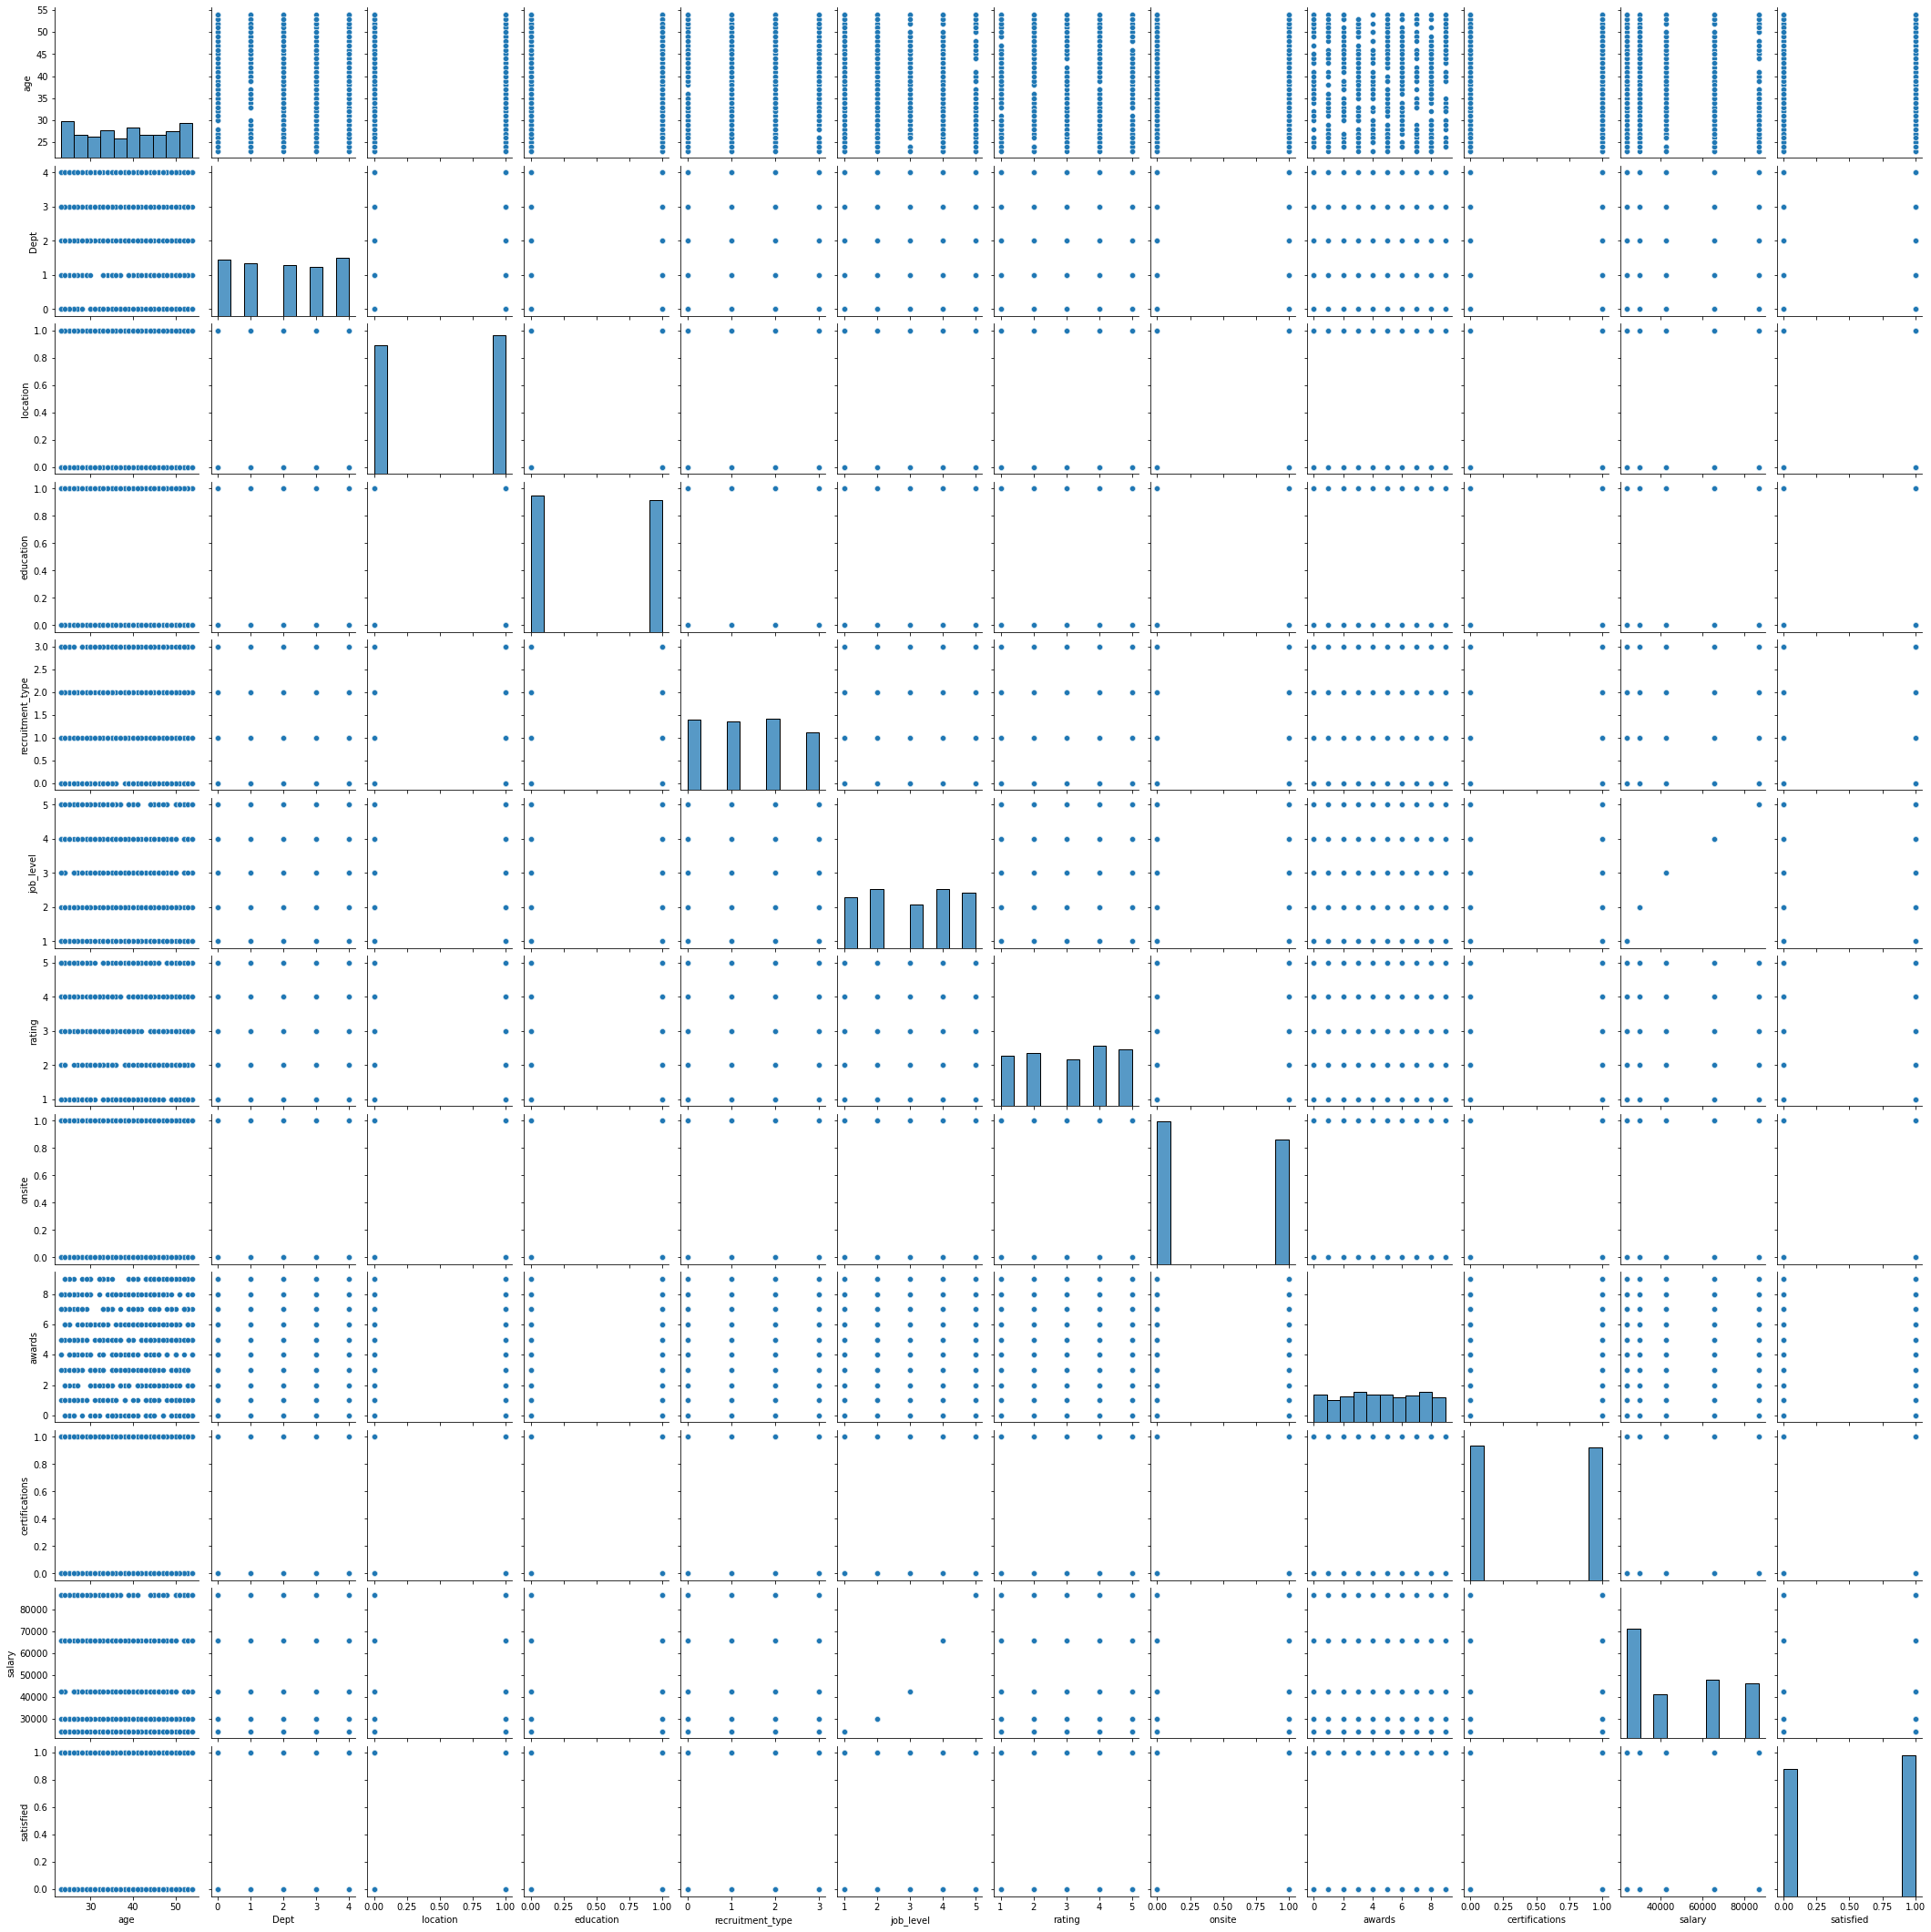

In [25]:
sns.pairplot(esi3)

In [26]:
esi3.to_csv("../Data/ESI3CA",index=True)